In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Covonutional_neural_network.modelUttils.loaddataset import load_dataset
from Covonutional_neural_network.CNNnetwork import CNN 
from Covonutional_neural_network.modelUttils.model_utils import load_model

In [2]:
data_folder  = [
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 0",
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 1",
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 2",
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 3",
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 4",
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 5",
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 6",
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 7",
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 8",
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 9",
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char add",
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char sub",
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char mul"
]

In [3]:
X, y = load_dataset(data_folder)
X.shape, y.shape

Loading Dataset .............
Shape of imags are: torch.Size([47977, 1, 64, 64])
Total images lodded: 47977


Label 0: 4651 number of images
Label 1: 4273 number of images
Label 2: 3878 number of images
Label 3: 2944 number of images
Label 4: 3958 number of images
Label 5: 3878 number of images
Label 6: 3240 number of images
Label 7: 3355 number of images
Label 8: 3382 number of images
Label 9: 3234 number of images
Label 10: 3421 number of images
Label 11: 4476 number of images
Label 12: 3287 number of images


Dataset loaded successfully!


(torch.Size([47977, 1, 64, 64]), torch.Size([47977]))

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import torch

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN()
model = load_model(model)
model.to(device)
model.eval()

Model parameters loaded from C:\Users\visha\OneDrive\Desktop\MathAI\CNN_Model\model_parameters_for_CNN.pth


CNN(
  (conv_layers): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(3, 3), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout2d(p=0.4, inplace=False)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Dropout2d(p=0.3, inplace=False)
    (9): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Dropout2d(p=0.4, inplace=False)
    (13): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (15): ReLU()
    (16): AdaptiveAvgPool2d(outp

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42, stratify=y)

In [7]:
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
if len(X_test_tensor.shape) == 3:
    X_test_tensor = X_test_tensor.unsqueeze(1)

C:\Users\visha\AppData\Local\Temp\ipykernel_20976\3405230565.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)


In [8]:
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, y_pred = torch.max(outputs, 1)
    y_pred = y_pred.cpu().numpy()

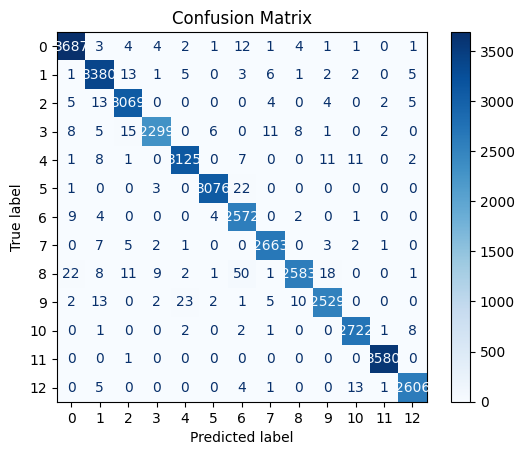

In [9]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [10]:
import torch

state_dir = torch.load("C:\\Users\\visha\\OneDrive\\Desktop\\MathAI\\CNN_Model\\model_parameters_for_CNN.pth")

# print all parameter names and their shapes
for param_tensor in state_dir:
    print(f'{param_tensor}: {state_dir[param_tensor].shape}')

print('\n')
for param_tensor in state_dir:
    print(f'{param_tensor}: \n {state_dir[param_tensor]}\n')

conv_layers.0.weight: torch.Size([16, 1, 5, 5])
conv_layers.0.bias: torch.Size([16])
conv_layers.1.weight: torch.Size([16])
conv_layers.1.bias: torch.Size([16])
conv_layers.1.running_mean: torch.Size([16])
conv_layers.1.running_var: torch.Size([16])
conv_layers.1.num_batches_tracked: torch.Size([])
conv_layers.4.weight: torch.Size([32, 16, 3, 3])
conv_layers.4.bias: torch.Size([32])
conv_layers.5.weight: torch.Size([32])
conv_layers.5.bias: torch.Size([32])
conv_layers.5.running_mean: torch.Size([32])
conv_layers.5.running_var: torch.Size([32])
conv_layers.5.num_batches_tracked: torch.Size([])
conv_layers.9.weight: torch.Size([64, 32, 3, 3])
conv_layers.9.bias: torch.Size([64])
conv_layers.10.weight: torch.Size([64])
conv_layers.10.bias: torch.Size([64])
conv_layers.10.running_mean: torch.Size([64])
conv_layers.10.running_var: torch.Size([64])
conv_layers.10.num_batches_tracked: torch.Size([])
conv_layers.13.weight: torch.Size([128, 64, 3, 3])
conv_layers.13.bias: torch.Size([128])
con